In [80]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

# Dataframes

In [81]:
df = pd.read_excel('1698405600_datasets/Data.xlsx')
data_description = pd.read_excel('1698405600_datasets/Variable_Description.xlsx')

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
data_description

,variable,description
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type (0 = Non anginal; 1 = Non typ...
3,trestbps,resting blood pressure (in mm Hg on admission...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; ...
6,restecg,resting electrocardiographic results
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to...


# Data Cleaning

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


type of each field is correctly presented

In [85]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [86]:
print(f'rows: {df.shape[0]}\ncolumns: {df.shape[1]}')

rows: 303
columns: 14


no missing values

#### Drop Duplicates

In [87]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
print(f'rows: {df.shape[0]}\ncolumns: {df.shape[1]}')

rows: 302
columns: 14


1 duplicated row was found

# EDA

In [89]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.324503,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.588366,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [90]:
df.columns
# sex cp fbs exang ca thal target

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\romy.bouabdo\AppData\Local\Temp\ipykernel_13452\2834981098.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['age'], df['trestbps'], df['chol'], df['restecg'], df['thalach'],


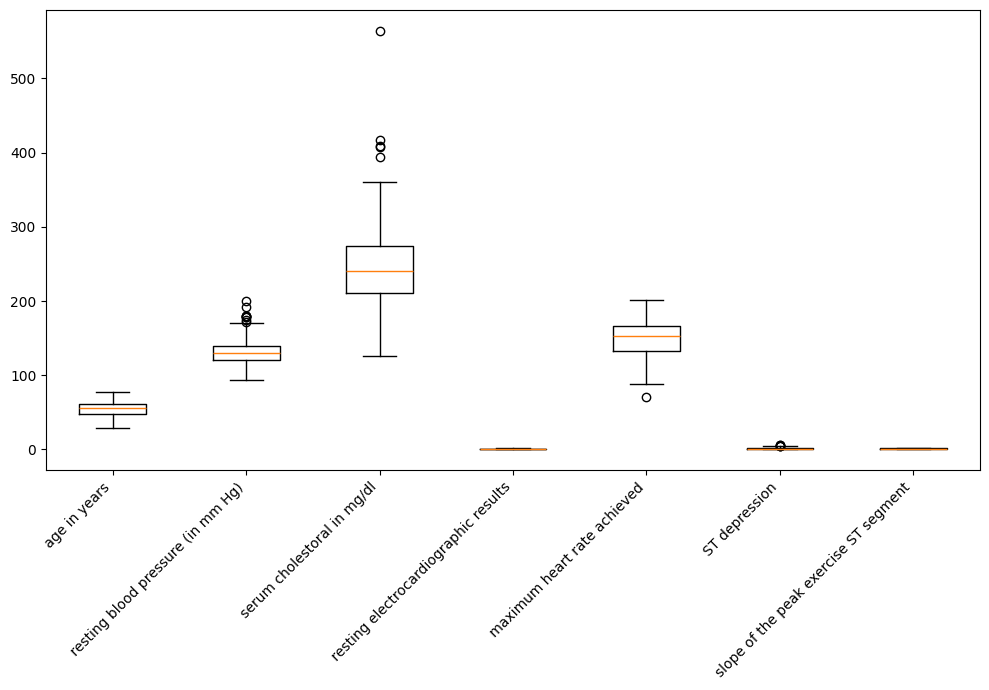

In [91]:
plt.figure(figsize=(10, 7))
plt.boxplot([df['age'], df['trestbps'], df['chol'], df['restecg'], df['thalach'], 
             df['oldpeak'], df['slope']], 
       labels = [' age in years', ' resting blood pressure (in mm Hg)', 
                 ' serum cholestoral in mg/dl', ' resting electrocardiographic results', ' maximum heart rate achieved', 
                 ' ST depression', 'slope of the peak exercise ST segment'] )
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

In [92]:
df['restecg'].value_counts()

restecg
1    151
0    147
2      4
Name: count, dtype: int64

In [93]:
df['slope'].value_counts()

slope
2    141
1    140
0     21
Name: count, dtype: int64

restecg and slope are also categorical features

C:\Users\romy.bouabdo\AppData\Local\Temp\ipykernel_13452\2520279444.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['oldpeak'], labels=[ 'ST depression'])


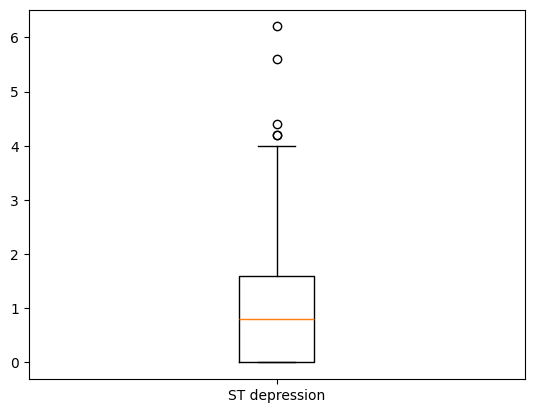

In [94]:
plt.boxplot(df['oldpeak'], labels=[ 'ST depression'])
plt.show()

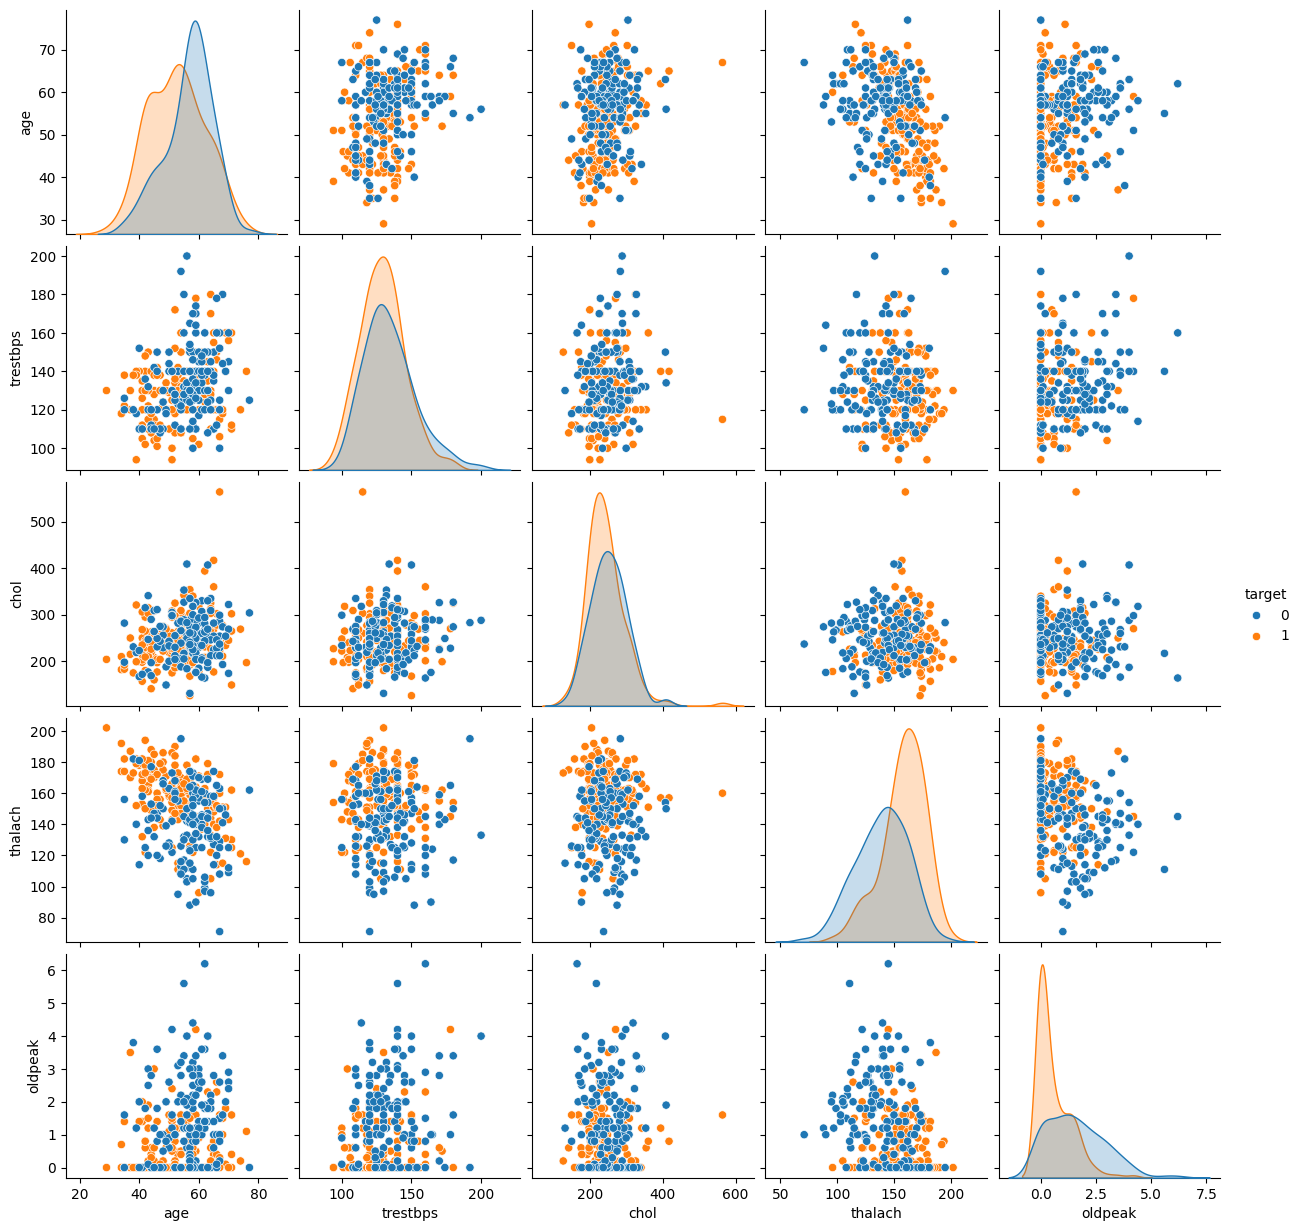

In [95]:
df_numerical = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
df_categorical = df[['sex', 'cp', 'fbs', 'restecg',
       'exang', 'slope', 'ca', 'thal', 'target']]
sns.pairplot(df_numerical, hue="target")

categorical features: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'

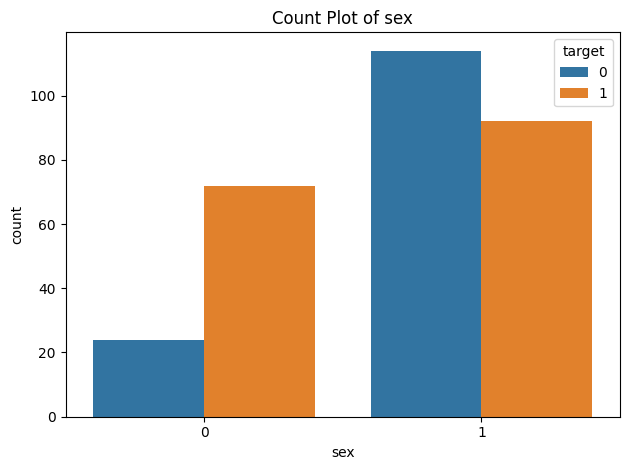

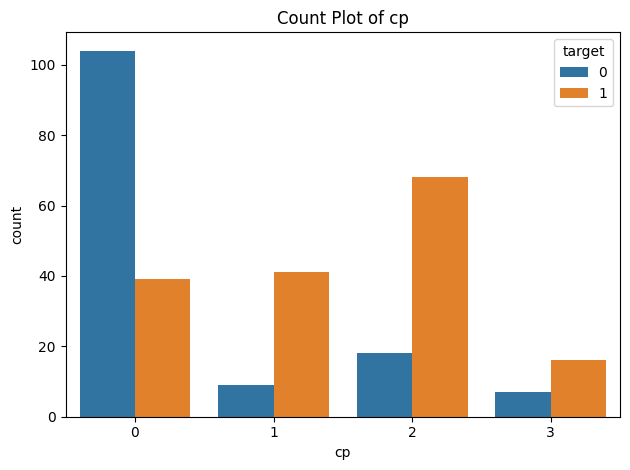

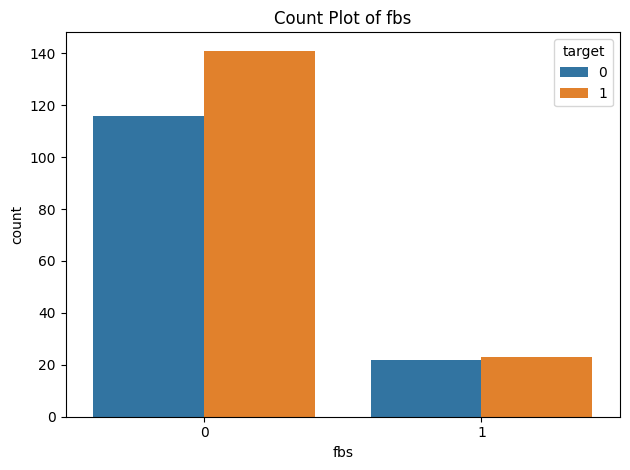

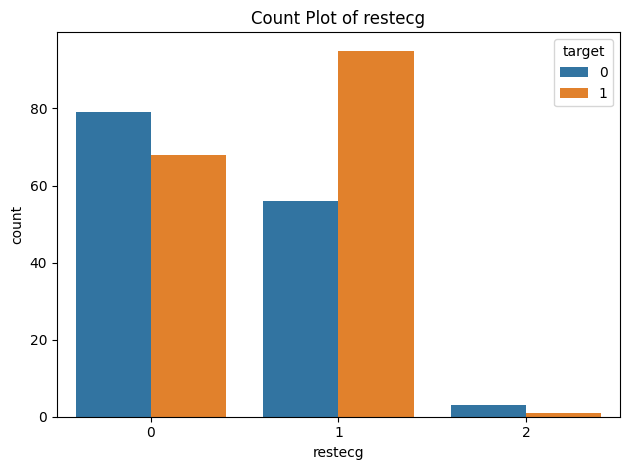

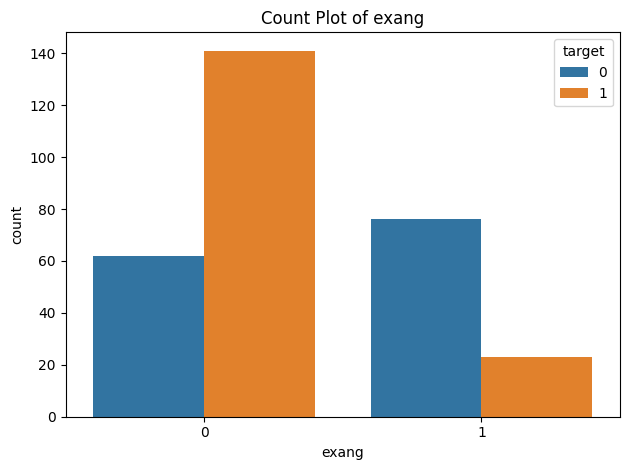

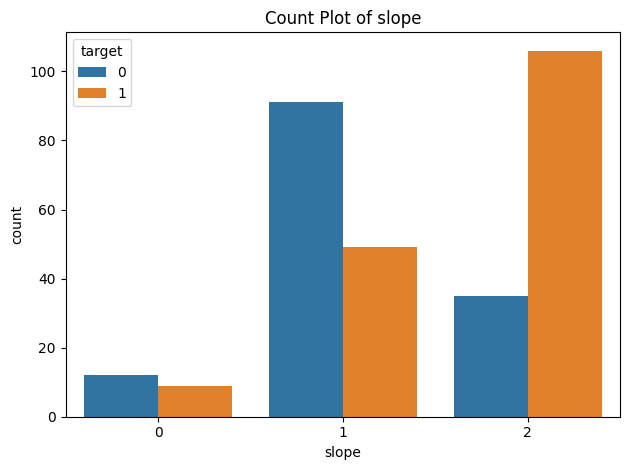

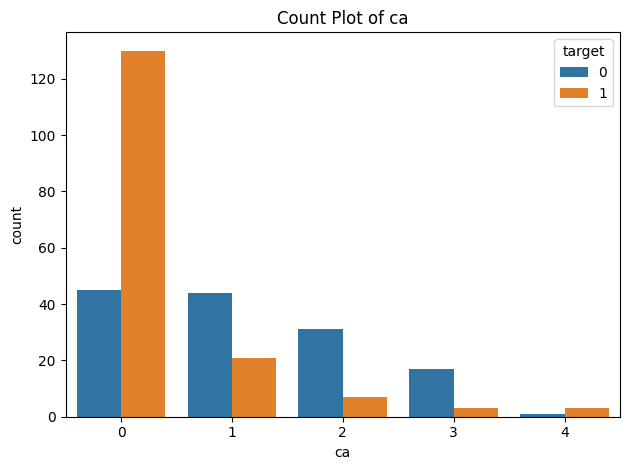

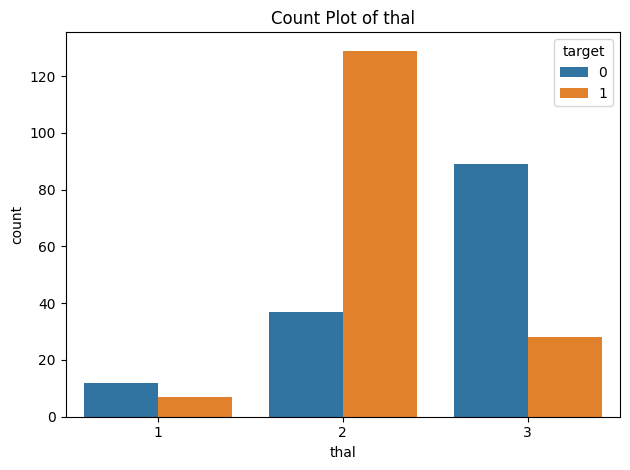

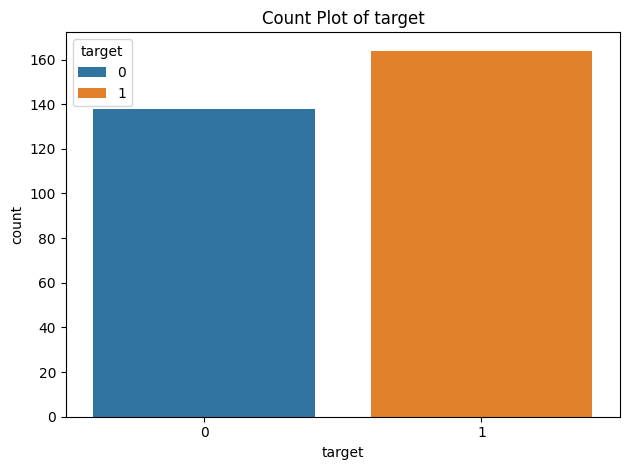

In [96]:
# plot categorical features
for column in df_categorical.columns:
    sns.countplot(x=column, hue="target", data=df_categorical)
    plt.title(f'Count Plot of {column}')  
    plt.tight_layout() 
    plt.show()

<Axes: >

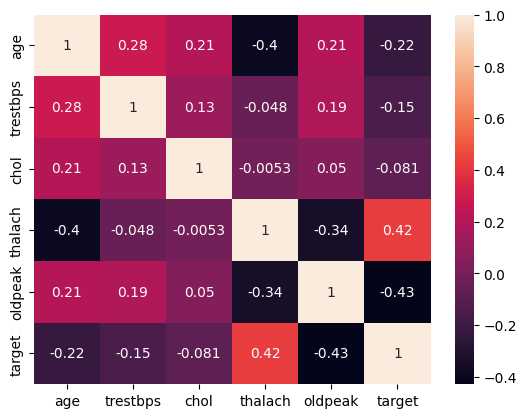

In [97]:
corr_df = df_numerical.corr(method = "pearson")
sns.heatmap(corr_df, annot=True)

### Based on these plots we can draw some hypothesus:

**For categorical features:**
- more females have Cardiovascular diseases
- non aginal chest pain is perceived for most targeted samples (with Cardiovascular diseases)
- the slope of the peak exercise ST segment is mostly 1 for targeted samples
- number of major vessels colored by flourosopy are 0 for non targeted samples
- mostly the thal for people with cardiovascular disease is 3: "reversable defect"

**For numerical features:**
- the numerical variables are not correlated between each other


### Occurrence of CVD Across Age

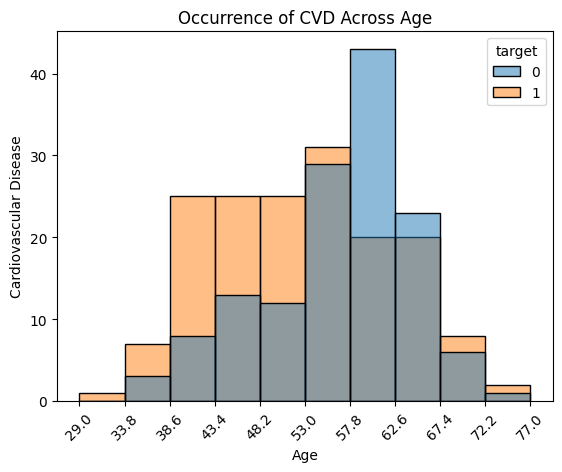

In [98]:
# retrieve number of bins using Sturges formula
n = len(df['age']) 
sturges_bins = int(np.ceil(1 + np.log2(n)))

sns.histplot( x='age', hue='target', data=df, bins=sturges_bins)

# Set the x-ticks to show the bin edges
bin_edges = np.linspace(df['age'].min(), df['age'].max(), sturges_bins + 1)
plt.xticks(bin_edges, rotation=45)  # Rotate for better visibility if necessary

plt.xlabel('Age')
plt.ylabel('Cardiovascular Disease')
plt.title('Occurrence of CVD Across Age')
plt.show()

We can see that this disease is more common for people aged between 57 and 65

### Composition of overall Patients w.r.t. Gender

Text(0.5, 1.0, 'Composition of Patients by Gender')

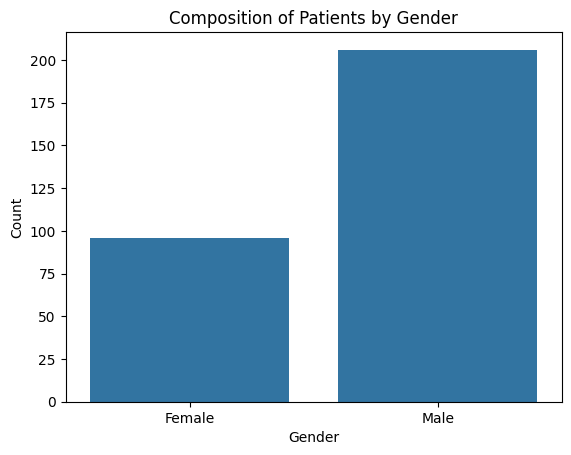

In [99]:
sns.countplot(x='sex', data=df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
# Set x-tick labels
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Composition of Patients by Gender')


There's a skew in our data where male are more than females for approximately 100 samples

### Resting Blood Pressure of the patient

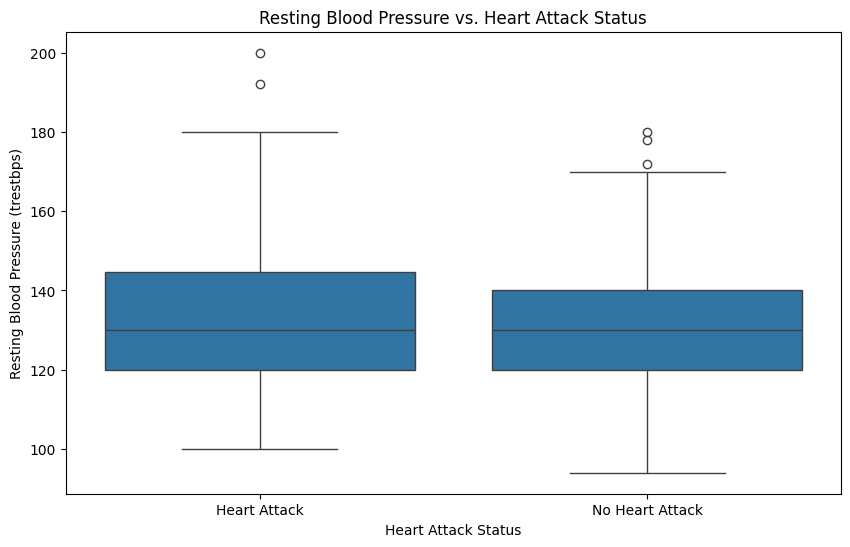

In [100]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.xticks([0, 1], ['Heart Attack', 'No Heart Attack'])
plt.xlabel('Heart Attack Status')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Resting Blood Pressure vs. Heart Attack Status')
plt.show()

They are almost similar but the ones with disease have bigger ranges of trestbps

### Relationship Between Cholesterol Levels and Our Target Variable

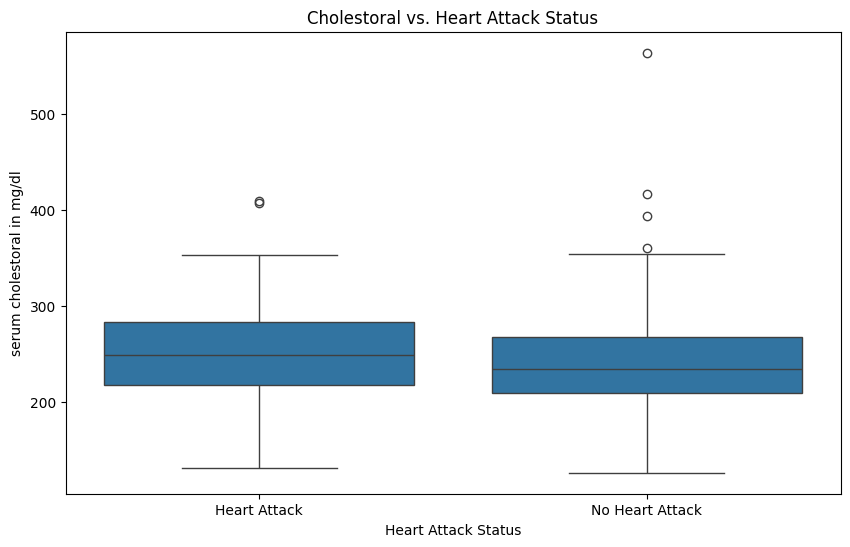

In [101]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.xticks([0, 1], ['Heart Attack', 'No Heart Attack'])
plt.xlabel('Heart Attack Status')
plt.ylabel( 'serum cholestoral in mg/dl')
plt.title('Cholestoral vs. Heart Attack Status')
plt.show()

There also doesn't seem anu clear relationship between them


### Relationship Between Peak Exercising and The Occurrence of a Heart Attack

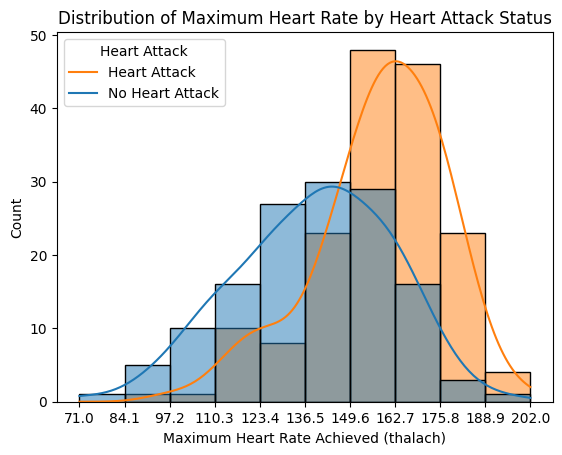

In [102]:
sns.histplot(data=df, x='thalach', hue='target', bins=10, kde=True) # multiple="stack"
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Count')
plt.title('Distribution of Maximum Heart Rate by Heart Attack Status')
plt.legend(title='Heart Attack', labels=['Heart Attack', 'No Heart Attack'])
bin_edges = np.linspace(df['thalach'].min(), df['thalach'].max(), 10 + 1)
plt.xticks(bin_edges)  
plt.show()

There seems to be a relationship between maximum heart rate acheived and being sick, where they mostly reach between 149.6 and 188.8.

**thalach is considered to be a major cause of CVD**


### Relationship Between oldpeak and The Occurrence of a Heart Attack

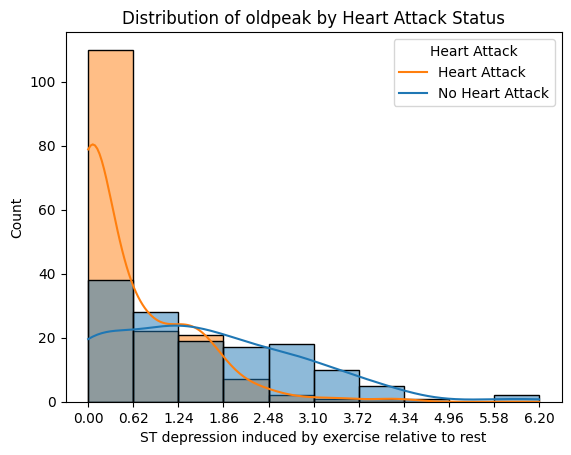

In [103]:
# retrieve number of bins using Sturges formula
n = len(df['oldpeak']) 
oldpeak_bins = int(np.ceil(1 + np.log2(n)))
sns.histplot(data=df, x='oldpeak', hue='target', bins=oldpeak_bins, kde=True) # multiple="stack"
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Count')
plt.title('Distribution of oldpeak by Heart Attack Status')
plt.legend(title='Heart Attack', labels=['Heart Attack', 'No Heart Attack'])
bin_edges = np.linspace(df['oldpeak'].min(), df['oldpeak'].max(), oldpeak_bins + 1)
plt.xticks(bin_edges)  
plt.show()

there seems to be a relationship between oldpeak and disease, oldpeak mostly ranges between 0 and 0.62 for the disease

# Logistic Regression

In [104]:
# Train and split the data

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,68,1,2,180,274,1,0,150,1,1.6,1,0,3
196,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [105]:
# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [106]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.84
Confusion Matrix:
 [[25  4]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

